In [1]:
import monkdata as m
import dtree as dt

In [2]:

print("Entropy of MONK-1 Training Dataset:", dt.entropy(m.monk1))
print("Entropy of MONK-2 Training Dataset:", dt.entropy(m.monk2))
print("Entropy of MONK-3 Training Dataset:", dt.entropy(m.monk3))

Entropy of MONK-1 Training Dataset: 1.0
Entropy of MONK-2 Training Dataset: 0.957117428264771
Entropy of MONK-3 Training Dataset: 0.9998061328047111


In [3]:
datasets = [m.monk1, m.monk2, m.monk3]
attributes = m.attributes

for i , dataset in enumerate(datasets):
    print(f"Dataset MONK-{i+1}:")
    for j,attribute in enumerate(attributes):
        gain=dt.averageGain(dataset,attribute)
        print(f"based on attribute-{j+1}:gain={gain}")

Dataset MONK-1:
based on attribute-1:gain=0.07527255560831925
based on attribute-2:gain=0.005838429962909286
based on attribute-3:gain=0.00470756661729721
based on attribute-4:gain=0.02631169650768228
based on attribute-5:gain=0.28703074971578435
based on attribute-6:gain=0.0007578557158638421
Dataset MONK-2:
based on attribute-1:gain=0.0037561773775118823
based on attribute-2:gain=0.0024584986660830532
based on attribute-3:gain=0.0010561477158920196
based on attribute-4:gain=0.015664247292643818
based on attribute-5:gain=0.01727717693791797
based on attribute-6:gain=0.006247622236881467
Dataset MONK-3:
based on attribute-1:gain=0.007120868396071844
based on attribute-2:gain=0.29373617350838865
based on attribute-3:gain=0.0008311140445336207
based on attribute-4:gain=0.002891817288654397
based on attribute-5:gain=0.25591172461972755
based on attribute-6:gain=0.007077026074097326


In [4]:
subsets = [dt.select(m.monk1, m.attributes[4], value) for value in m.attributes[4].values]
for i,subset in enumerate(subsets):
    print(f"Subset for a5 = {m.attributes[4].values[i]}:")
    for j, attribute in enumerate(m.attributes):
        if attribute != m.attributes[4]: 
            gain = dt.averageGain(subset, attribute)
            print(f"  Attribute a{j+1}: Information Gain = {gain:.4f}")

Subset for a5 = 1:
  Attribute a1: Information Gain = 0.0000
  Attribute a2: Information Gain = 0.0000
  Attribute a3: Information Gain = 0.0000
  Attribute a4: Information Gain = 0.0000
  Attribute a6: Information Gain = 0.0000
Subset for a5 = 2:
  Attribute a1: Information Gain = 0.0402
  Attribute a2: Information Gain = 0.0151
  Attribute a3: Information Gain = 0.0373
  Attribute a4: Information Gain = 0.0489
  Attribute a6: Information Gain = 0.0258
Subset for a5 = 3:
  Attribute a1: Information Gain = 0.0331
  Attribute a2: Information Gain = 0.0022
  Attribute a3: Information Gain = 0.0180
  Attribute a4: Information Gain = 0.0191
  Attribute a6: Information Gain = 0.0451
Subset for a5 = 4:
  Attribute a1: Information Gain = 0.2063
  Attribute a2: Information Gain = 0.0339
  Attribute a3: Information Gain = 0.0259
  Attribute a4: Information Gain = 0.0759
  Attribute a6: Information Gain = 0.0033


In [5]:
subset_a5_2 = dt.select(m.monk1, m.attributes[4], 2)
subsets_a5_2_a4 = [dt.select(subset_a5_2, m.attributes[3], value) for value in m.attributes[3].values]

subset_a5_3 = dt.select(m.monk1, m.attributes[4], 3)
subsets_a5_3_a6 = [dt.select(subset_a5_3, m.attributes[5], value) for value in m.attributes[5].values]

subset_a5_4 = dt.select(m.monk1, m.attributes[4], 4)
subsets_a5_4_a1 = [dt.select(subset_a5_4, m.attributes[0], value) for value in m.attributes[0].values]

In [10]:

tree_monk1 = dt.buildTree(m.monk1, m.attributes,3)
tree_monk2 = dt.buildTree(m.monk2, m.attributes,3)
tree_monk3 = dt.buildTree(m.monk3, m.attributes,3)

print("Performance of Decision Trees:")
print(f"MONK-1: Train Accuracy = {dt.check(tree_monk1, m.monk1):.4f}, Test Accuracy = {dt.check(tree_monk1, m.monk1test):.4f}")
print(f"MONK-2: Train Accuracy = {dt.check(tree_monk2, m.monk2):.4f}, Test Accuracy = {dt.check(tree_monk2, m.monk2test):.4f}")
print(f"MONK-3: Train Accuracy = {dt.check(tree_monk3, m.monk3):.4f}, Test Accuracy = {dt.check(tree_monk3, m.monk3test):.4f}")

import drawtree_qt5 as drt
# drt.drawTree(tree_monk1)
# drt.drawTree(tree_monk2)
drt.drawTree(tree_monk3)

Performance of Decision Trees:
MONK-1: Train Accuracy = 0.8710, Test Accuracy = 0.7523
MONK-2: Train Accuracy = 0.7692, Test Accuracy = 0.6319
MONK-3: Train Accuracy = 0.9508, Test Accuracy = 0.9722


SystemExit: 0

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

# kcross validation
def kfold_pruning(data, attributes, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    original_tree = dt.buildTree(data, attributes,3)#maxstep=3
    best_tree = original_tree
    best_accuracy = 0

    pruned_trees = dt.allPruned(original_tree)
    
    for pruned_tree in pruned_trees:
        accuracies = []

        for train_idx, val_idx in kf.split(data):
            train_set = [data[i] for i in train_idx]
            val_set = [data[i] for i in val_idx]

            accuracy = dt.check(pruned_tree, val_set)
            accuracies.append(accuracy)

        mean_accuracy = np.mean(accuracies)

        if mean_accuracy > best_accuracy:
            best_tree = pruned_tree
            best_accuracy = mean_accuracy

    return best_tree, best_accuracy


best_tree, best_accuracy = kfold_pruning(m.monk1, m.attributes, k=5)
print("Best pruned tree validation accuracy (5-fold):", best_accuracy)


Best pruned tree validation accuracy (k-fold): 0.8716666666666667


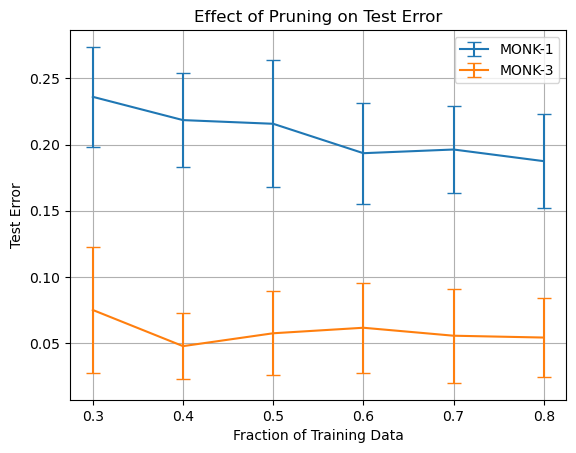

In [7]:
import random
import matplotlib.pyplot as plt 
def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]


def prune_and_evaluate(dataset, testset, attributes, fraction, runs=10):
    errors = []
    for _ in range(runs):
        train_set, val_set = partition(dataset, fraction)
        tree = dt.buildTree(train_set, attributes,3)###########################################
        pruned_trees = dt.allPruned(tree)
    
        best_tree = tree
        best_accuracy = dt.check(tree, val_set)
        for pruned_tree in pruned_trees:
            accuracy = dt.check(pruned_tree, val_set)
            if accuracy >= best_accuracy:
                best_tree = pruned_tree
                best_accuracy = accuracy
        
        test_error = 1 - dt.check(best_tree, testset)
        errors.append(test_error)
    
    return np.mean(errors), np.std(errors)

fractions = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
datasets = [("MONK-1", m.monk1, m.monk1test), ("MONK-3", m.monk3, m.monk3test)]


results= {}
for name, dataset, testset in datasets:
    means, stds = [], []
    for fraction in fractions:
        mean, std = prune_and_evaluate(dataset, testset, m.attributes, fraction)
        means.append(mean)
        stds.append(std)
    results[name] = (means, stds)

for name, (means, stds) in results.items():
    plt.errorbar(fractions, means, yerr=stds, label=name, capsize=5)

plt.xlabel("Fraction of Training Data")
plt.ylabel("Test Error")
plt.title("Effect of Pruning on Test Error")
plt.legend()
plt.grid()
plt.show()